In [154]:
import pandas as pd
##Based on the discussion need to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## including seaborn and matplotlib for various plots
import matplotlib.pyplot as plt
import seaborn as sb
##Read the Data
file_path = '/Users/gabhatt/Downloads/loan.csv'
loanData = pd.read_csv(file_path)


In [155]:
## Need to check how data looks
print(loanData.head(10))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.

In [156]:
#Some colums have null value. Need to check if it is relevant
print(loanData.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [157]:
## A lot of colums have NaN values which is unnecessary. Lets get rid of those
## Added how param as it was deleting all the columns with a Nan value
loanData.dropna(axis = 1, inplace=True, how = 'all')

In [158]:
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [159]:
## There is a possibility that we are looking at the columns which might have all the values same. 

## Function to get Same value columns in the Dataframe
def getuniqueCol(df):
    same_val_col = []
    for col in df.columns:
        unique_number = df[col].nunique()
        if unique_number == 1:
            same_val_col.append(col)
    return same_val_col

print(getuniqueCol(loanData))

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [160]:
## Got 9 columns which has the same value, need to get rid of that. 
columns_to_drop = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
loanData.drop(columns = columns_to_drop, inplace=True)


In [161]:
print(loanData.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0   10.65%       162.87     B        B2  ...         5000.00        863.16   
1   15.27%        59.83     C        C4  ...          456.46        435.17   
2   15.96%        84.33     C        C5  ...         2400.00        605.67   
3   13.49%       339.31     C        C1  ...        10000.00       2214.92   
4   12.69%        67.79     B        B5  ...         2475.94       1037.39   

  total_rec_late_fee  recoveries collection_recovery_fee last_

In [162]:
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [163]:
## Based on the info given in the column text excel, some columns look irrelevant as the focus is
## more on identifying loan defaulter before the loan processing. 
## Need to remove such columns 
## Candidate Columns looks like - id, member_id, funded_amnt, emp_title, url, desc, title, zip_code, addr_state, delinq_2yrs, mths_since_last_delinq, mths_since_last_record, 
## out_prncp_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, revol_bal,  out_prncp, recoveries, collection_recovery_fee, last_pymnt_d, 
## last_pymnt_amnt, next_pymnt_d, last_credit_pull_d

unnecessary_cols = ['id', 'member_id', 'funded_amnt', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record', 
'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'revol_bal',  'out_prncp', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 
'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'] 

loanData.drop(columns=unnecessary_cols, inplace=True)

In [164]:
print(loanData.head())

   loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
4       3000           3000.0   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc  ... issue_d  loan_status  \
0        B2  10+ years           RENT     24000.0  ...  Dec-11   Fully Paid   
1        C4   < 1 year           RENT     30000.0  ...  Dec-11  Charged Off   
2        C5  10+ years           RENT     12252.0  ...  Dec-11   Fully Paid   
3        C1  10+ years           RENT     49200.0  ...  Dec-11   Fully Paid   
4        B5     1 year           RENT     80000.0  ...  Dec-11      Current   

          purpose    dti  earliest_cr_line inq_last_6mths  open_acc  pub_rec  \
0     

In [165]:
loanData.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [166]:
## We have got all the necessary columns. Its time to see if we can get rid of the innecessary rows
## For loan status we are interested only in those either fully paid or charged off

loanData = loanData[loanData.loan_status != 'Current']
print(loanData.head())

   loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
5       5000           5000.0   36 months    7.90%       156.46     A   

  sub_grade emp_length home_ownership  annual_inc  ... issue_d  loan_status  \
0        B2  10+ years           RENT     24000.0  ...  Dec-11   Fully Paid   
1        C4   < 1 year           RENT     30000.0  ...  Dec-11  Charged Off   
2        C5  10+ years           RENT     12252.0  ...  Dec-11   Fully Paid   
3        C1  10+ years           RENT     49200.0  ...  Dec-11   Fully Paid   
5        A4    3 years           RENT     36000.0  ...  Dec-11   Fully Paid   

          purpose    dti  earliest_cr_line inq_last_6mths  open_acc  pub_rec  \
0     

In [167]:
## Lets now check if we have got any missing values
loanData.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

In [168]:
## emp_length and revol_util have got the missing values. We need to fill those
## We can fill with mean, median or mode. But lets see how the data look like
loanData['emp_length'].mean


<bound method Series.mean of 0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object>

In [169]:
loanData['emp_length'].median

<bound method Series.median of 0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object>

In [170]:
loanData['emp_length'].mode

<bound method Series.mode of 0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object>

In [171]:
loanData['emp_length'].describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [172]:
## Considering the mean, median , mode the most frequent item is prefered to fill
loanData.emp_length.fillna(loanData.emp_length.mode()[0], inplace=True)

In [173]:
loanData['emp_length'].describe()

count         38577
unique           11
top       10+ years
freq           9521
Name: emp_length, dtype: object

In [174]:
loanData['revol_util'].describe()

count     38527
unique     1088
top          0%
freq        954
Name: revol_util, dtype: object

In [175]:
## for revol_util only 50 are not populated, lets get rid of those
loanData.dropna(axis = 0, subset=['revol_util'], inplace=True )

In [176]:
## Lets now validate we don't have any missing value
loanData.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

In [177]:
## The data type is not numeric in case of rovol_util and int_rate. And also emp_length shouls be numeric
perct_removal_lambda = lambda x: x.split('%')[0]
year_alignment_lambda = lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else (x.split(' ')[0] if " " in x else 0))
loanData.revol_util = pd.to_numeric(loanData.revol_util.apply(perct_removal_lambda))
loanData.int_rate = pd.to_numeric(loanData.int_rate.apply(perct_removal_lambda))
loanData.emp_length = pd.to_numeric(loanData.emp_length.apply(year_alignment_lambda))

In [178]:
print(loanData)

       loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0           5000           4975.0   36 months     10.65       162.87     B   
1           2500           2500.0   60 months     15.27        59.83     C   
2           2400           2400.0   36 months     15.96        84.33     C   
3          10000          10000.0   36 months     13.49       339.31     C   
5           5000           5000.0   36 months      7.90       156.46     A   
...          ...              ...         ...       ...          ...   ...   
39712       2500           1075.0   36 months      8.07        78.42     A   
39713       8500            875.0   36 months     10.28       275.38     C   
39714       5000           1325.0   36 months      8.07       156.84     A   
39715       5000            650.0   36 months      7.43       155.38     A   
39716       7500            800.0   36 months     13.75       255.43     E   

      sub_grade  emp_length home_ownership  annual_inc  ... iss

{'whiskers': [<matplotlib.lines.Line2D at 0x1450ce6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1450cd290>,
 'boxes': [<matplotlib.lines.Line2D at 0x139677190>],
 'medians': [<matplotlib.lines.Line2D at 0x1450cc390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1450c3a10>],
 'means': []}

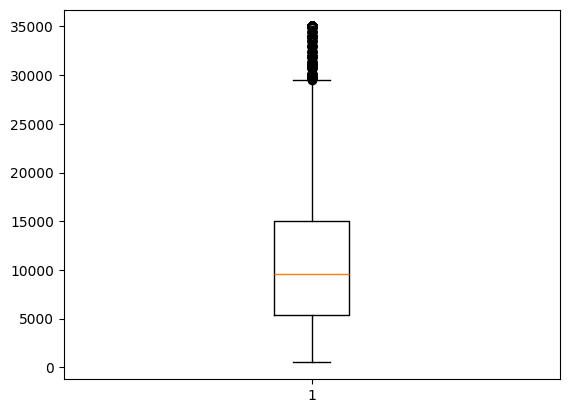

In [179]:
## Lets now check the outlier and remove it 
## The most obvious columns are loan_amnt, dti , annual_inc, funded_amnt_inv

## Lets check loan_amnt
plt.boxplot(loanData.loan_amnt)

In [180]:
#Lets check the p75, p90, p95 and p99 to understand the spread
quantile = loanData.loan_amnt.quantile([0.75, 0.9, 0.95, 0.98, 0.99])
quantile

0.75    15000.0
0.90    21600.0
0.95    25000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [181]:
# loan-amnt looks fine as per the quantile distribution

{'whiskers': [<matplotlib.lines.Line2D at 0x145079850>,
 'caps': [<matplotlib.lines.Line2D at 0x14506c690>,
 'boxes': [<matplotlib.lines.Line2D at 0x14506e210>],
 'medians': [<matplotlib.lines.Line2D at 0x1450f0990>],
 'fliers': [<matplotlib.lines.Line2D at 0x1450f1390>],
 'means': []}

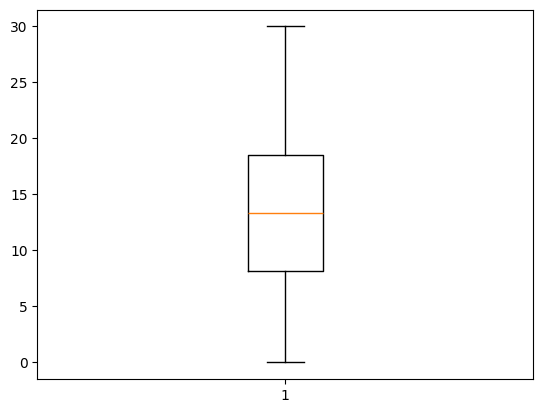

In [182]:
## Lets check dti
plt.boxplot(loanData.dti)

{'whiskers': [<matplotlib.lines.Line2D at 0x144641bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x144640310>,
 'boxes': [<matplotlib.lines.Line2D at 0x139610790>],
 'medians': [<matplotlib.lines.Line2D at 0x144632d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x144632310>],
 'means': []}

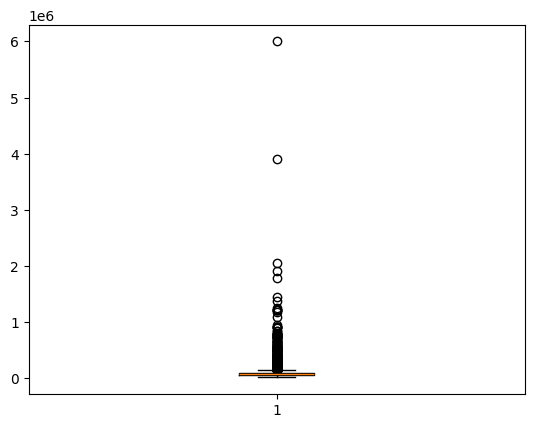

In [183]:
## dti looks fine checking for annual_inc
plt.boxplot(loanData.annual_inc)

In [184]:
## Looks like some outliers are there lets check the quantile to get the understanding about what can be removed
quantile = loanData.annual_inc.quantile([0.75, 0.9, 0.95, 0.99])
quantile

0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [185]:
## Lets collect till p95 as this is more aligned with the bulk of the data
p95 = loanData.annual_inc.quantile(0.95)
loanData = loanData[loanData.annual_inc <= p95]

{'whiskers': [<matplotlib.lines.Line2D at 0x1445d9390>,
 'caps': [<matplotlib.lines.Line2D at 0x1445cfb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1445d9f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1445ce550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1445cdad0>],
 'means': []}

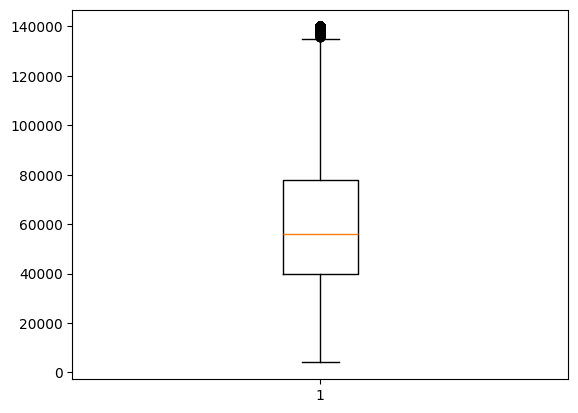

In [186]:
plt.boxplot(loanData.annual_inc)

{'whiskers': [<matplotlib.lines.Line2D at 0x1445ba250>,
 'caps': [<matplotlib.lines.Line2D at 0x1445bb710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1445b9690>],
 'medians': [<matplotlib.lines.Line2D at 0x141d20c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x141d21690>],
 'means': []}

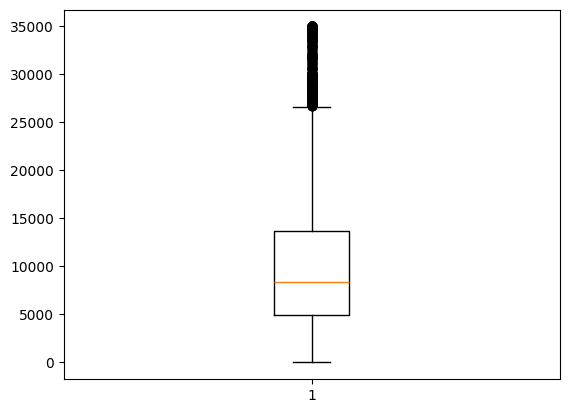

In [187]:
##Lets check funded_amnt_inv now if any outliers are there
plt.boxplot(loanData.funded_amnt_inv)

In [189]:
## Lets check the quantile distribution for funded_amnt_inv
quantile = loanData.funded_amnt_inv.quantile([0.75, 0.9, 0.95, 0.97, 0.98,  0.99])
quantile

0.75    13649.999283
0.90    19750.000000
0.95    23949.287805
0.97    24975.000000
0.98    27953.287538
0.99    31966.803281
Name: funded_amnt_inv, dtype: float64

In [190]:
## funded_amnt_inv also looks fine as there is a contiuous distributiob

In [193]:
# Lets visualize some Categorical data like subgrade, grade, home_ownership, purpose

## Subgrade column
loanData.sub_grade = pd.to_numeric(loanData.sub_grade.apply(lambda x: x[-1]))
loanData.sub_grade

0        2
1        4
2        5
3        1
5        4
        ..
39711    1
39712    4
39713    1
39714    4
39716    2
Name: sub_grade, Length: 36606, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

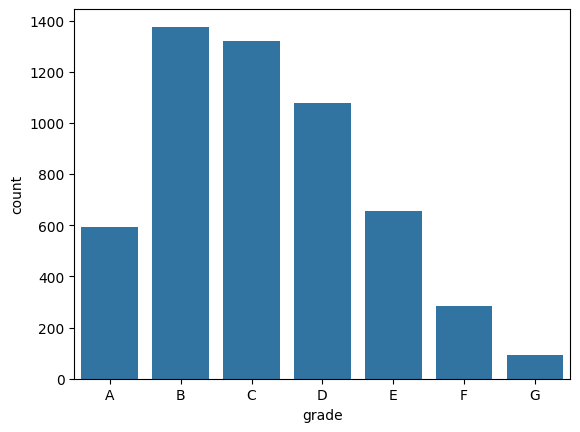

In [201]:
## Lets visualize the grade distribuition for loans which are charged off
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sb.countplot(x = 'grade', data=loanData[loanData.loan_status == 'Charged Off'], order=grade_order)

<Axes: xlabel='grade', ylabel='count'>

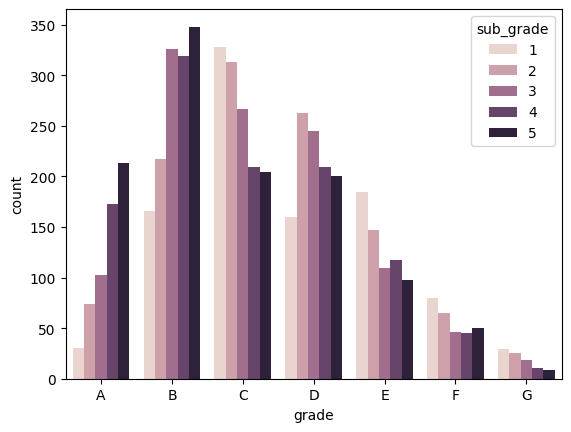

In [204]:
## It would be good to have a granular look as well on subgrade
sb.countplot(x='grade', order = grade_order, hue='sub_grade', data=loanData[loanData.loan_status == 'Charged Off'])

In [205]:
## Lets now visualize the home_ownership
## Lets first see the distribution
loanData['home_ownership'].value_counts()

home_ownership
RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: count, dtype: int64

In [206]:
## None is looking weird here as only 3 records are there. Lets move it under Other
loanData.home_ownership.replace(to_replace=['NONE'], value='OTHER', inplace=True)
loanData['home_ownership'].value_counts()

home_ownership
RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: count, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

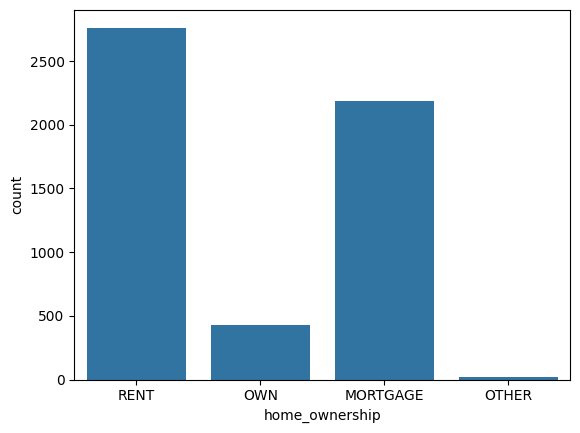

In [207]:
## Lets plot the graph for home_ownership
sb.countplot(x = 'home_ownership', data=loanData[loanData.loan_status == 'Charged Off'])

In [208]:
## Lets see the distribution of the purpose now
loanData['purpose'].value_counts()

purpose
debt_consolidation    17293
credit_card            4782
other                  3686
home_improvement       2551
major_purchase         2041
small_business         1622
car                    1446
wedding                 892
medical                 639
moving                  548
vacation                364
house                   338
educational             309
renewable_energy         95
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='purpose'>

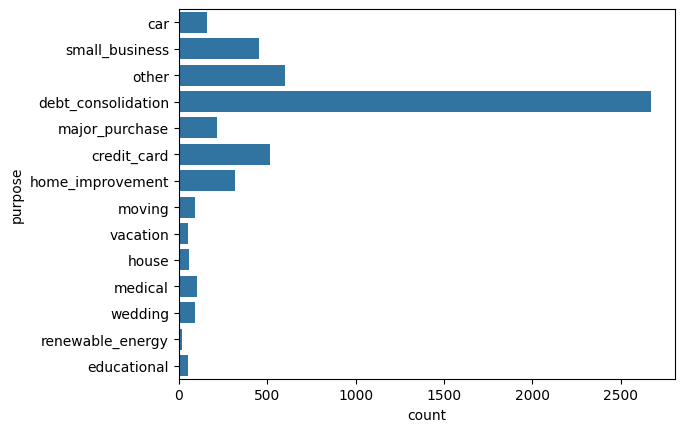

In [213]:
## Data distribution looks fine here - Lets plot a similat countplot
sb.countplot(y = 'purpose', data=loanData[loanData.loan_status == 'Charged Off'])

In [219]:
## We have some numerical columns which are useful to catagorize to get better insights. 
## I am looking into - int_rate, open_acc, revol_util, total_acc, annual_inc
## Lets check the distributiobn to create the bins
check_data = loanData.filter(['int_rate', 'open_acc', 'revol_util', 'total_acc', 'annual_inc'])
print(check_data['int_rate'].describe())
print(check_data['open_acc'].describe())
print(check_data['revol_util'].describe())
print(check_data['total_acc'].describe())
print(check_data['annual_inc'].describe())

count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64
count    36606.000000
mean         9.173086
std          4.351894
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64
count    36606.000000
mean        48.659741
std         28.282836
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64
count    36606.000000
mean        21.655630
std         11.229937
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64
count     36606.000000
mean      60890.563839
std       27741.337421
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max     

In [220]:

## Creating 5 bins for each column and values are splitted in 5 ranges ranging from min - max
int_rate_group = ['5%-9%', '9%-13%', '13%-17%', '17%-21%', '21%-24%']
open_acc_group = ['2-10', '10-19', '19-27', '27-36', '36-44']
revol_util_group = ['0-20', '20-40', '40-60', '60-80', '80-100']
total_acc_group = ['2-20', '20-37', '37-55', '55-74', '74-90']
annual_inc_group = ['3K-31K', '31K-58K', '51K-85K', '85K-112K', '112K-140K']

loanData['int_rate_cat'] = pd.cut(loanData['int_rate'], bins=5, precision=0, labels=int_rate_group)
loanData['open_acc_cat'] = pd.cut(loanData['open_acc'], bins=5, precision=0, labels=open_acc_group)
loanData['revol_util_cat'] = pd.cut(loanData['revol_util'], bins=5, precision=0, labels=revol_util_group)
loanData['total_acc_cat'] = pd.cut(loanData['total_acc'], bins=5, precision=0, labels=total_acc_group)
loanData['annual_inc_cat'] = pd.cut(loanData['annual_inc'], bins=5, precision=0, labels=annual_inc_group)

In [221]:
loanData.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'int_rate_cat', 'open_acc_cat',
       'revol_util_cat', 'total_acc_cat', 'annual_inc_cat'],
      dtype='object')

In [222]:
loanData['int_rate_cat'].head()

0     9%-13%
1    13%-17%
2    13%-17%
3    13%-17%
5      5%-9%
Name: int_rate_cat, dtype: category
Categories (5, object): ['5%-9%' < '9%-13%' < '13%-17%' < '17%-21%' < '21%-24%']

<Axes: xlabel='int_rate_cat', ylabel='count'>

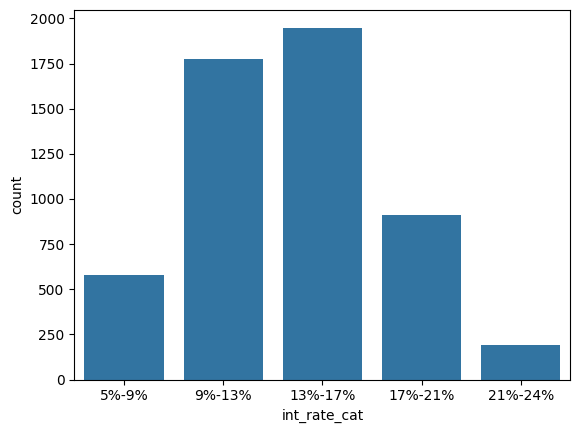

In [226]:
## Lets now visualize the Charged off loan against the newly created columns
sb.countplot(x='int_rate_cat', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='open_acc_cat', ylabel='count'>

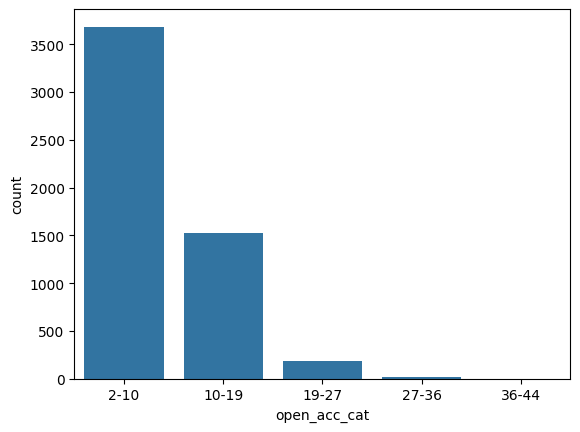

In [227]:
sb.countplot(x='open_acc_cat', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='revol_util_cat', ylabel='count'>

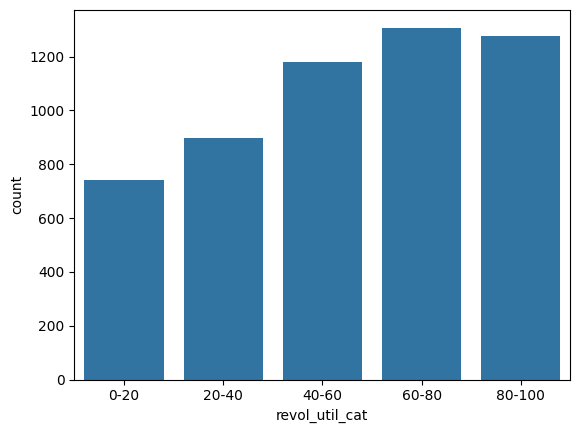

In [228]:
sb.countplot(x='revol_util_cat', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='total_acc_cat', ylabel='count'>

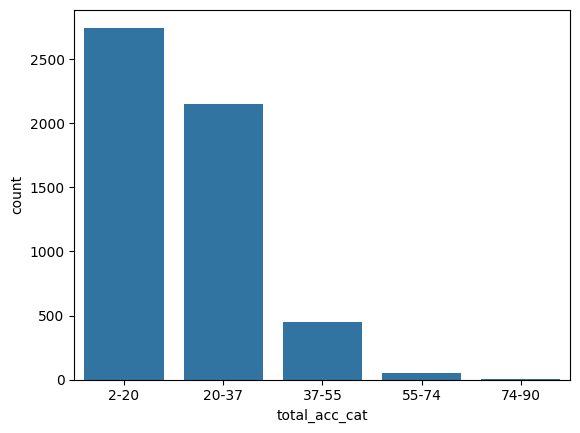

In [229]:
sb.countplot(x='total_acc_cat', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='annual_inc_cat', ylabel='count'>

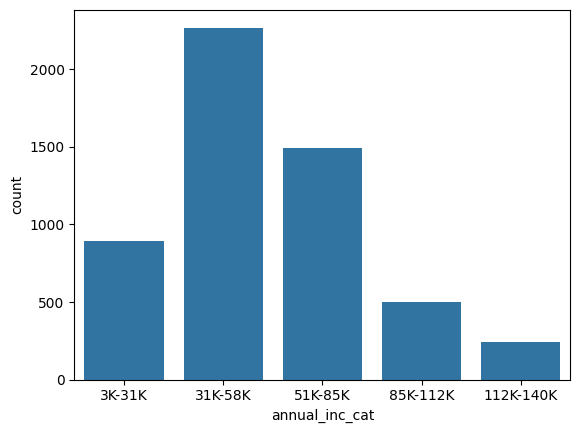

In [230]:

sb.countplot(x='annual_inc_cat', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='count', ylabel='verification_status'>

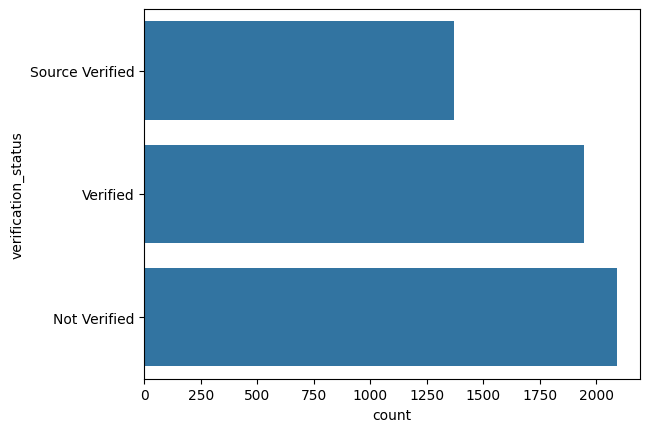

In [232]:
## Lets check on some more existing columns and see how the numbers look against them
sb.countplot(y='verification_status', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='inq_last_6mths', ylabel='count'>

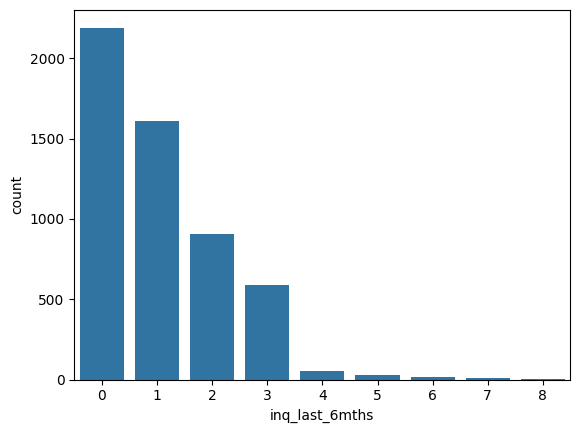

In [236]:
sb.countplot(x='inq_last_6mths', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='pub_rec', ylabel='count'>

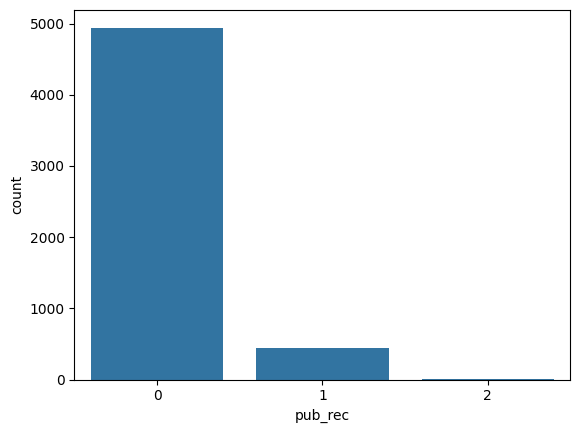

In [237]:
sb.countplot(x='pub_rec', data=loanData[loanData.loan_status == 'Charged Off'])


In [238]:
## Lets now check the numbers against the loan issue date
## Lets see by month and the year
loanData.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [253]:
## Lets clean it a bit and create month and year column
month_year = loanData.issue_d.str.partition("-")
month_year[2].describe()


count     36606
unique        5
top          11
freq      19437
Name: 2, dtype: object

In [254]:
loanData['issue_month'] = month_year[0]
loanData['issue_year'] = '20' + month_year[2]

<Axes: xlabel='issue_month', ylabel='count'>

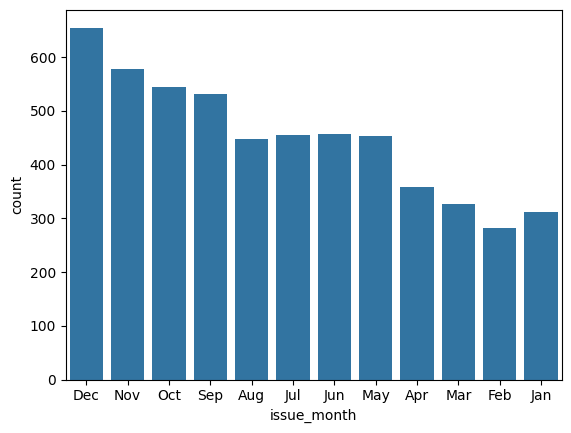

In [255]:
sb.countplot(x='issue_month', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='issue_year', ylabel='count'>

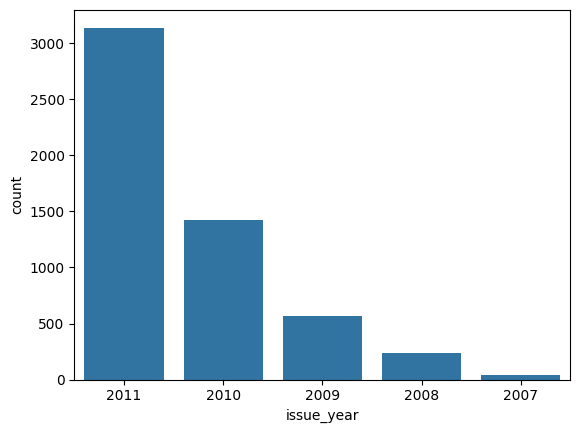

In [256]:
sb.countplot(x='issue_year', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='term', ylabel='count'>

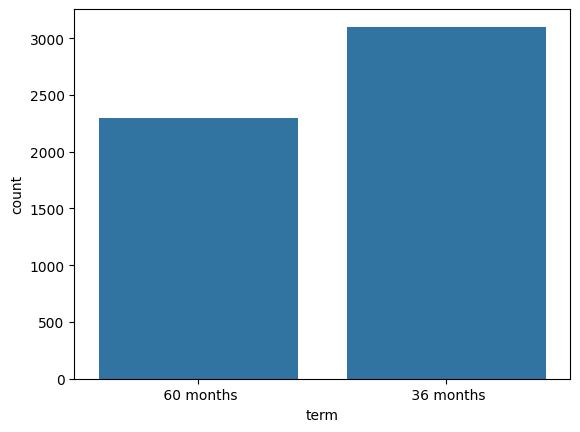

In [257]:
sb.countplot(x='term', data=loanData[loanData.loan_status == 'Charged Off'])


In [262]:
loanData.installment.describe()

count    36606.000000
mean       312.088564
std        199.238384
min         15.690000
25%        163.110000
50%        270.845000
75%        408.902500
max       1305.190000
Name: installment, dtype: float64

In [263]:
installment_group = ['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305']
loanData['installment_cat'] = pd.cut(loanData.installment, bins=10, labels=installment_group)

In [268]:
loanData.funded_amnt_inv.describe()

count    36606.000000
mean      9902.311039
std       6730.696329
min          0.000000
25%       4988.276705
50%       8396.342174
75%      13649.999283
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [265]:
funded_amt_group = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'] 
loanData['funded_amt_cat'] = pd.cut(loanData.funded_amnt_inv, bins=7, labels=funded_amt_group)

In [269]:
loanData.loan_amnt.describe()

count    36606.000000
mean     10690.058324
std       7048.412687
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [266]:
loan_amt_group = ['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']
loanData['loan_amt_cat'] = pd.cut(loanData.loan_amnt, bins=7, labels=loan_amt_group)

In [270]:
loanData.dti.describe()

count    36606.000000
mean        13.450146
std          6.660418
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

In [267]:
dti_group = ['0-6','6-12','12-18','18-24','24-30']
loanData['dti_cat'] = pd.cut(loanData.dti, bins=5, labels=dti_group)

<Axes: xlabel='installment_cat', ylabel='count'>

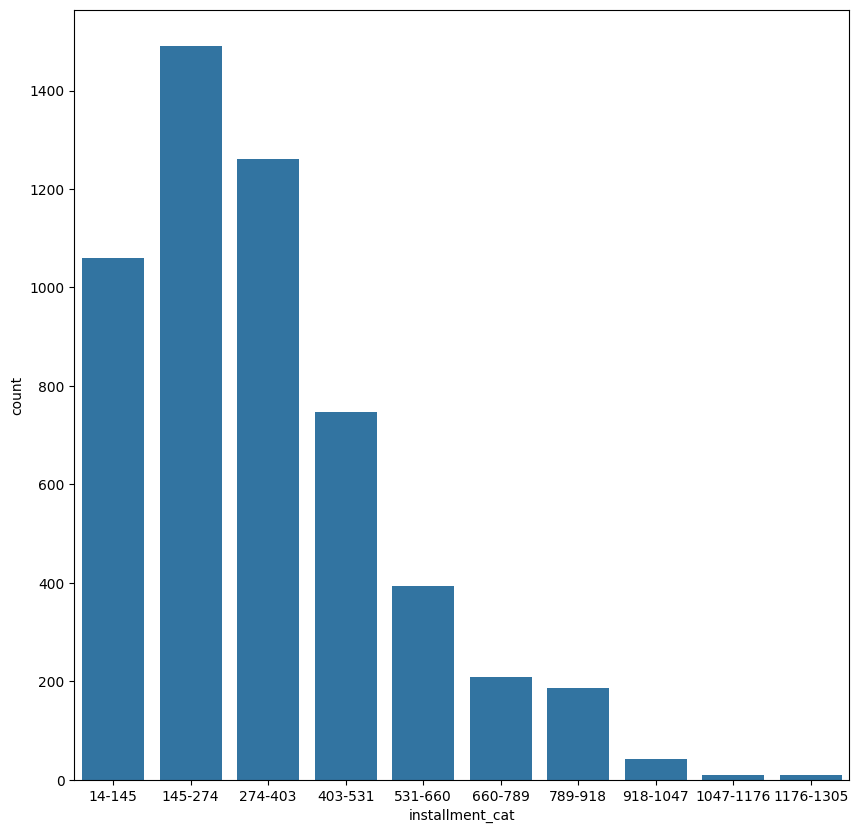

In [276]:
plt.figure(figsize=(10, 10))
sb.countplot(x='installment_cat', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='funded_amt_cat', ylabel='count'>

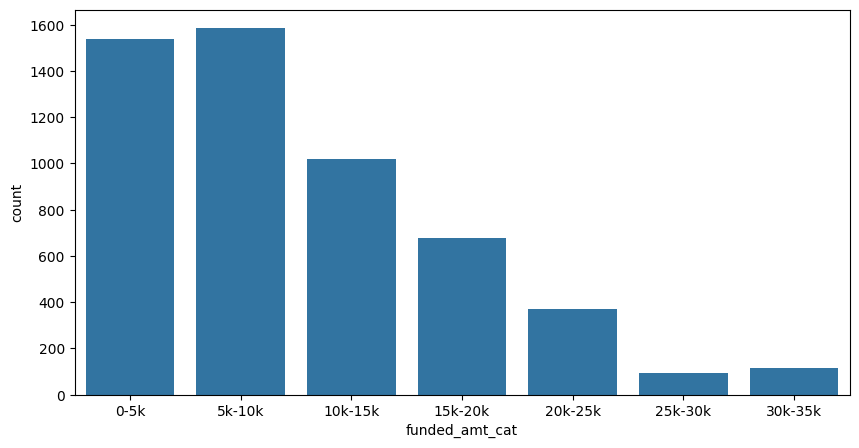

In [279]:
plt.figure(figsize=(10, 5))
sb.countplot(x='funded_amt_cat', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='loan_amt_cat', ylabel='count'>

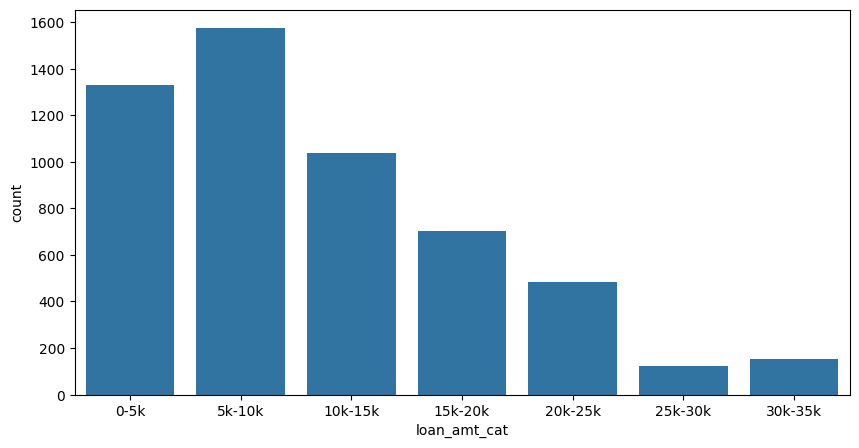

In [280]:
plt.figure(figsize=(10, 5))
sb.countplot(x='loan_amt_cat', data=loanData[loanData.loan_status == 'Charged Off'])


<Axes: xlabel='dti_cat', ylabel='count'>

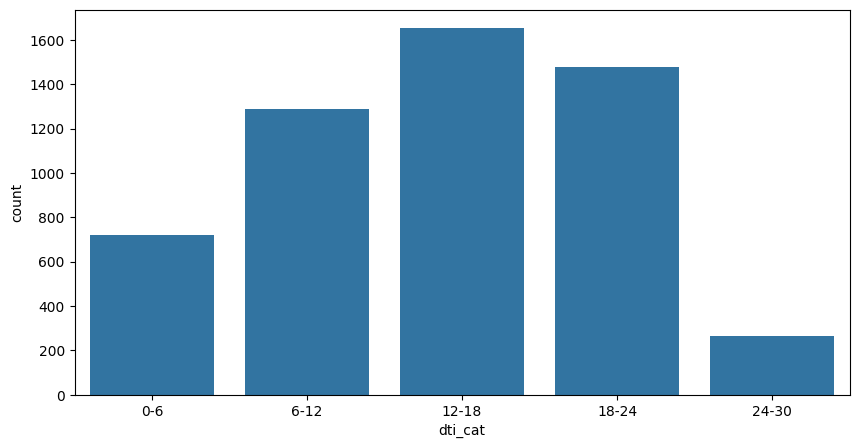

In [281]:
plt.figure(figsize=(10, 5))
sb.countplot(x='dti_cat', data=loanData[loanData.loan_status == 'Charged Off'])


# Observations
## Analysis of "Charged Off" Loans against Each Variable

Below are the observations regarding "Charged Off" loans with respect to each variable:

### Higher Probability of Defaulting When:
- Debt-to-Income Ratio (DTI) is between 12 and 18.
- Investors fund the amount between 5,000 and 10,000.
- The requested loan amount is between 5,000 and 10,000.
- Monthly installments are between 145K and 274K.
- The loan term is 36 months.
- The loan status is not verified.
- Applicants have an income range of 31,000 to 58,000.
- Applicants receive an interest rate of 13% to 17%.
- The purpose of the loan is 'debt consolidation.'
- Applicants have between 2 and 10 open accounts
- Applicants have house ownership status as 'RENT.'
- Applicants have 0 inquiries in the last 6 months.
- The loan status is not verified.


In [282]:
# Lets check the Correlation between various columns

numeric_columns = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec']
correlation_mat = loanData[numeric_columns].corr() 
 

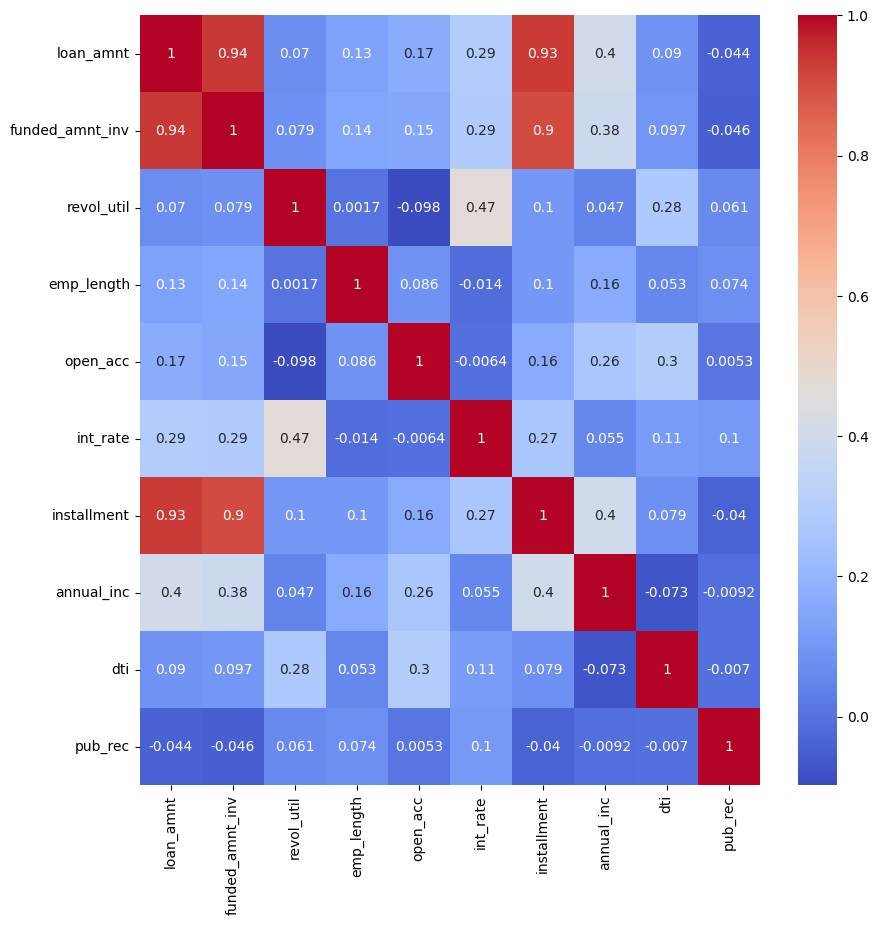

In [283]:
## Lets draw the correlation between each other to understand the data 
plt.figure(figsize=(10, 10))
sb.heatmap(correlation_mat, xticklabels = correlation_mat.columns.values, yticklabels= correlation_mat.columns.values, cmap= 'coolwarm', annot = True) 
plt.show() 


<Axes: xlabel='home_ownership', ylabel='annual_inc'>

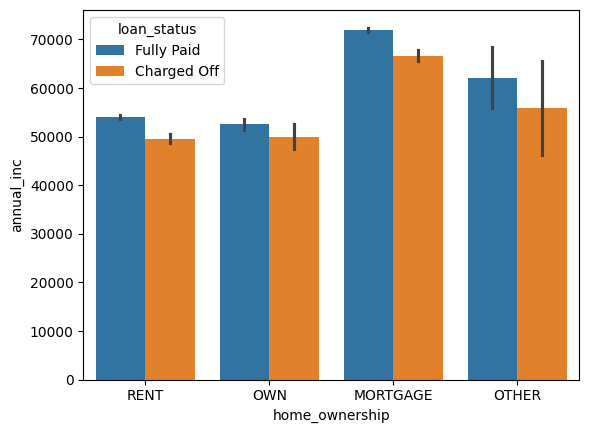

In [284]:
## Lets draw some conclusion by comparing 2 cols - 

## Comparing Annual income vs home ownership

sb.barplot(data=loanData, x='home_ownership', y='annual_inc', hue='loan_status')

<Axes: xlabel='int_rate_cat', ylabel='annual_inc'>

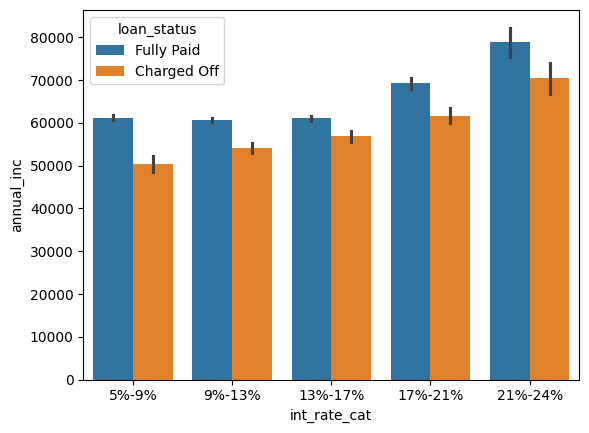

In [286]:
## Comparing Annual income vs Interest rate

sb.barplot(data=loanData, x='int_rate_cat', y='annual_inc', hue='loan_status')

<Axes: xlabel='annual_inc', ylabel='purpose'>

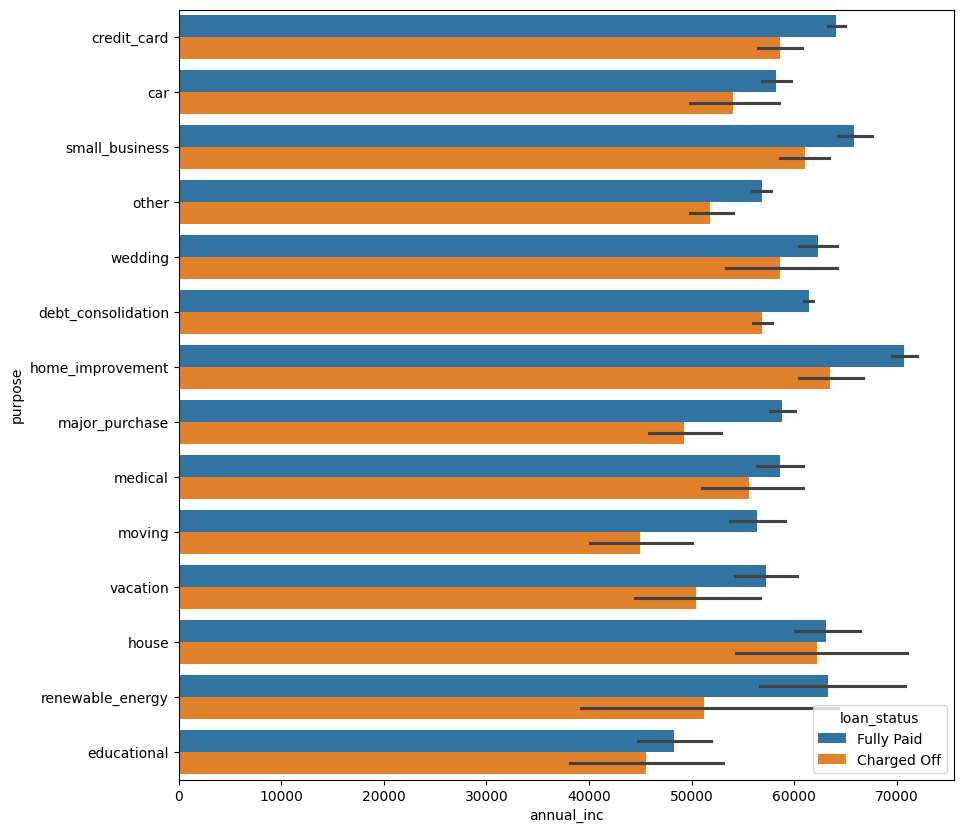

In [289]:
## Comparing Annual income vs Loan purpose
plt.figure(figsize=(10, 10))
sb.barplot(data=loanData, y='purpose', x='annual_inc', hue='loan_status')

<Axes: xlabel='loan_amt_cat', ylabel='int_rate'>

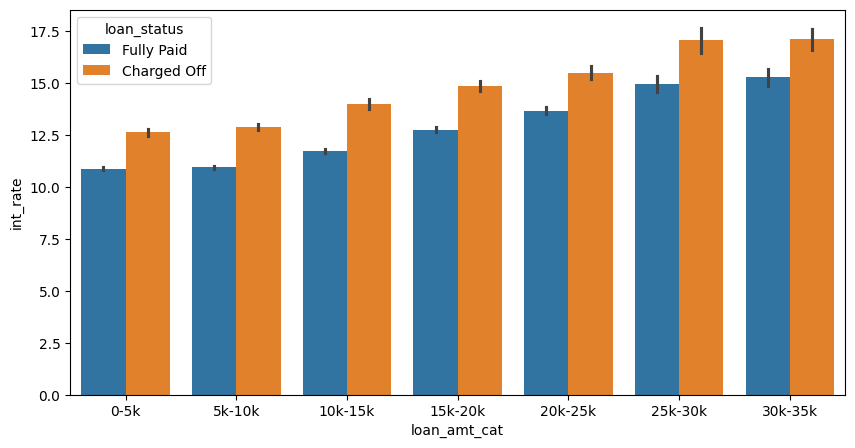

In [291]:
## Lets check the loan amount with other comuns
## Comparing loan_amt_cat vs int_rate
plt.figure(figsize=(10, 5))
sb.barplot(data=loanData, y='int_rate', x='loan_amt_cat', hue='loan_status')

<Axes: xlabel='loan_amt_cat', ylabel='purpose'>

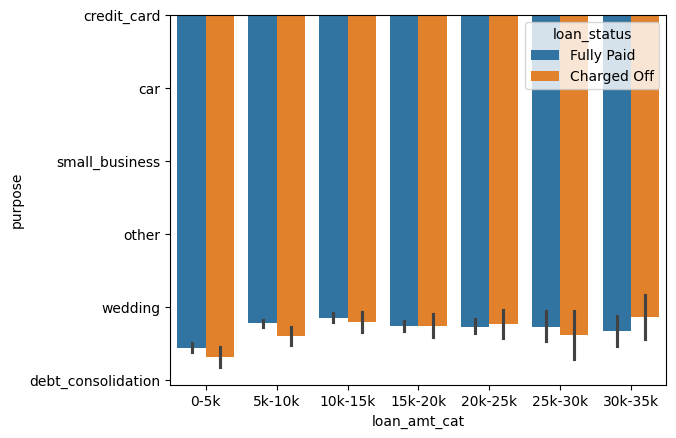

In [307]:
## Comparing loan_amt_cat vs purpose
sb.barplot(data=loanData, y='purpose', x='loan_amt_cat', hue='loan_status')

<Axes: xlabel='loan_amnt', ylabel='home_ownership'>

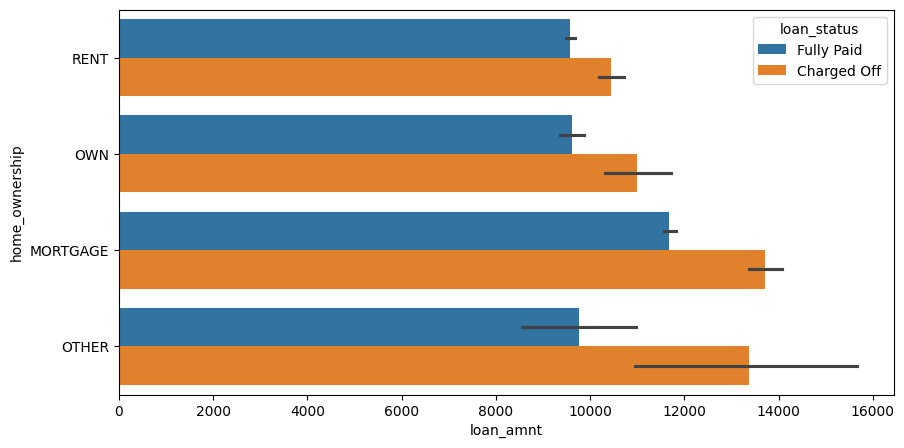

In [293]:
## Comparing loan_amt vs catagory
plt.figure(figsize=(10, 5))
sb.barplot(data=loanData, y='home_ownership', x='loan_amnt', hue='loan_status')

<Axes: xlabel='loan_amnt', ylabel='issue_month'>

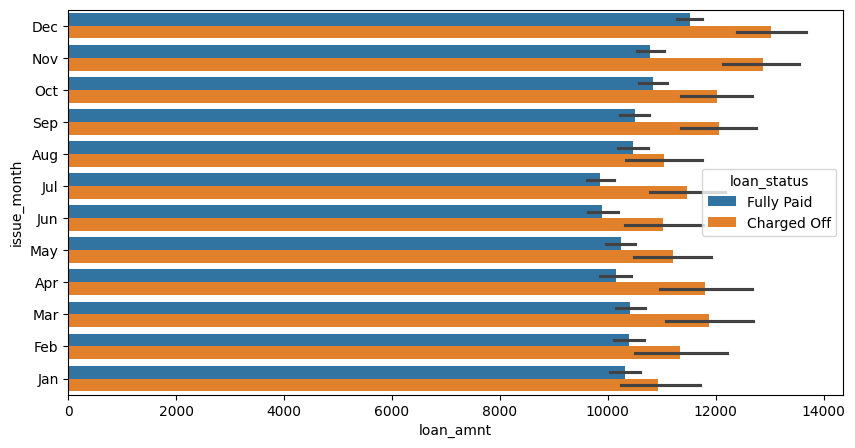

In [296]:
## Comparing loan_amt vs issueing month
plt.figure(figsize=(10, 5))
sb.barplot(data=loanData, y='issue_month', x='loan_amnt', hue='loan_status')

<Axes: xlabel='grade', ylabel='loan_amnt'>

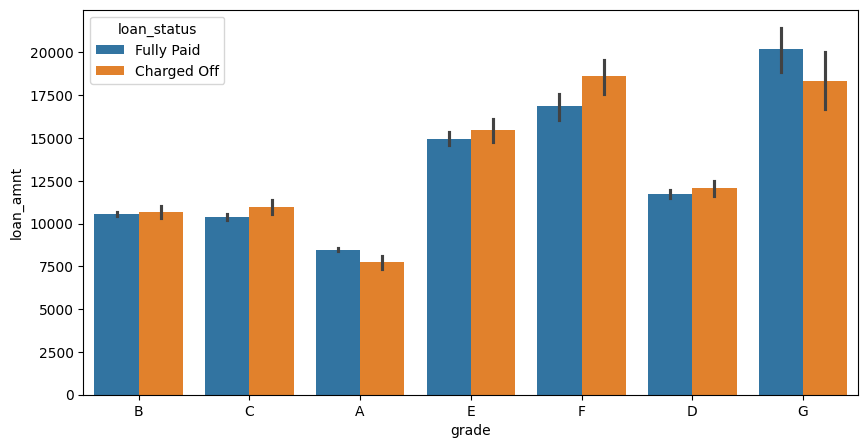

In [303]:
## Comparing loan_amnt vs grade
plt.figure(figsize=(10, 5))
sb.barplot(data=loanData, x='grade', y='loan_amnt', hue='loan_status')

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

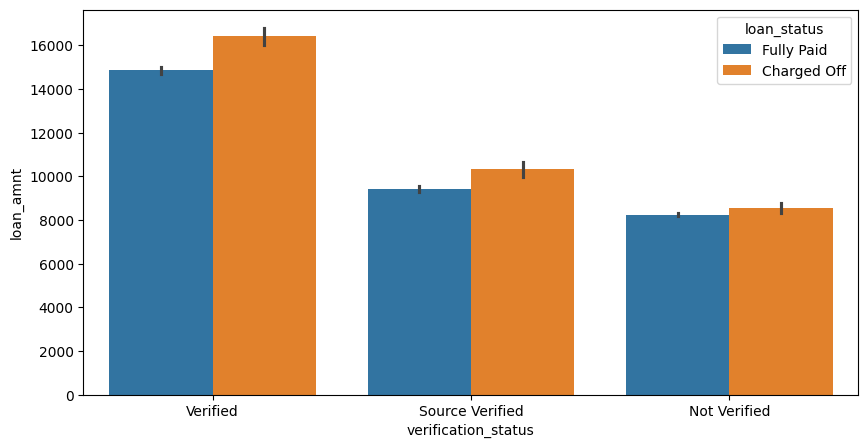

In [301]:
## Comparing loan_amt vs emp_length
plt.figure(figsize=(10, 5))
sb.barplot(data=loanData, x='verification_status', y='loan_amnt', hue='loan_status')

<Axes: xlabel='grade', ylabel='int_rate'>

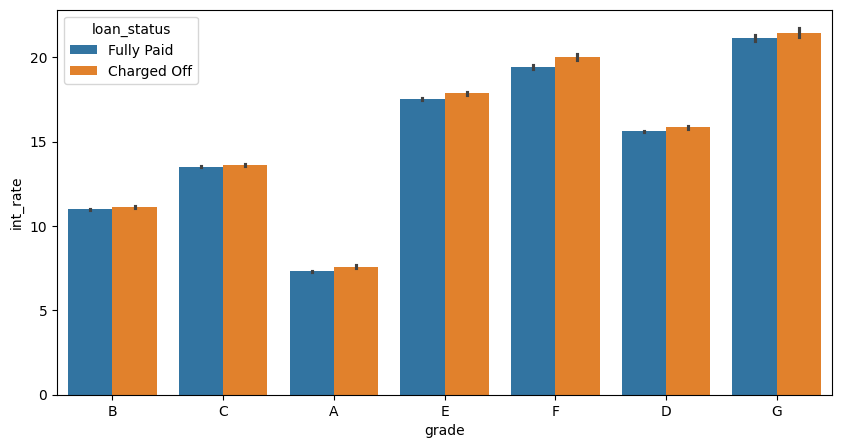

In [302]:
## Comparing grade vs int_rate
plt.figure(figsize=(10, 5))
sb.barplot(data=loanData, x='grade', y='int_rate', hue='loan_status')

# Observations

There is a higher possibility of defaulting when:

- Candidates have a home ownership status of 'MORTGAGE' and an income close to $60,000 - $70,000.
- Candidates have an interest rate in the range of 21% - 24% and an income range of $70,000 - $80,000.
- Candidates are taking a loan for home improvement and have an income range of $60,000 - $70,000.
- Candidates are taking a loan in the range of $30,000 - $35,000 and are charged an interest rate of 15% - 17%.
- Candidate's loan amount is between $0 - $5,000, and the loan is taken for debt consolidation.
- Candidates have home ownership as 'MORTGAGE' and a loan amount of $14,000 - $16,000.
- When the grade is 'F' and the loan amount is between $15,000 - $20,000.
- When the source is verified, and the loan amount is more than $16,000.
- When the grade is 'G' and the interest rate is above 20%.
